<a href="https://colab.research.google.com/github/wcaraker76/4GeeksProjects/blob/main/Titanic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('https://github.com/sayyed-uoft/fullstackai/raw/main/titanic_data.csv')

In [ ]:
display(df.info()) #get basic info on what columns, how many are non null, and it's type
display(df.describe()) #more advanced data with stats
df.head(15) #display the first 15 rows to be able to compare 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.isnull().sum() #sum up the total number of rows that will need something replaced

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#combine SibSp - Parch into new column FamilySize
df['FamilySize'] = df.SibSp - df.Parch

df.FamilySize.head(15)


0     1
1     1
2     0
3     1
4     0
5     0
6     0
7     2
8    -2
9     1
10    0
11    0
12    0
13   -4
14    0
Name: FamilySize, dtype: int64

In [ ]:
#remove unwanted columns (Cabin, Name, Ticket, SibSp, Parch)

df.drop(['Cabin', 'Name', 'Ticket', 'SibSp', 'Parch'], axis = 1, inplace = True)
df.head(15)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0
5,6,0,3,male,NaN,8.4583,Q,0
6,7,0,1,male,54.0,51.8625,S,0
7,8,0,3,male,2.0,21.0750,S,2
8,9,1,3,female,27.0,11.1333,S,-2
9,10,1,2,female,14.0,30.0708,C,1


In [ ]:
#replace missing ages with the mean age of gender and Pclass 
df['Age'] = df.groupby(['Pclass', 'Sex']).Age.apply(lambda x: x.fillna(x.mean()))
df['Age'] = df['Age'].round(1)
df.head(15)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0
5,6,0,3,male,26.5,8.4583,Q,0
6,7,0,1,male,54.0,51.8625,S,0
7,8,0,3,male,2.0,21.0750,S,2
8,9,1,3,female,27.0,11.1333,S,-2
9,10,1,2,female,14.0,30.0708,C,1


In [ ]:
#For missing Embarked, find your strategy
df1 = df[df.isna().any(axis=1)] #display which embarked are NaN
display(df1)
 

#shows a dataframe with the sex, whether they survived, what cabin they are in, and their class
em_table = df.groupby(["Sex", "Survived", 'Pclass']).Embarked.value_counts() 

#where they stayed, survived, and by sex
s_table = df.groupby(['Embarked', 'Survived']).Sex.value_counts()

# number of embarked by sex 
num_table = df.groupby(['Embarked']).Sex.value_counts()

#survived by sex 
surv_table = df.groupby(['Sex']).Survived.value_counts()

#class by sex 
class_table = df.groupby(['Sex']).Pclass.value_counts()

#where they stayed by class and sex
which_table = df.groupby(['Embarked', 'Sex']).Pclass.value_counts()

#if they survived based on their class and sex 
answer_table = df.groupby(['Survived', 'Sex']).Pclass.value_counts()

#the number of embarked by class 
who_table = df.groupby(['Embarked']).Pclass.value_counts()

#display the tables
display(em_table)
display(s_table)
display(num_table)
display(surv_table)
display(who_table)
display(class_table)
display(which_table)
display(answer_table)



,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
61,62,1,1,female,38.0,80.0,NaN,0
829,830,1,1,female,62.0,80.0,NaN,0


Sex     Survived  Pclass  Embarked
female  0         1       S             2
                          C             1
                  2       S             6
                  3       S            55
                          Q             9
                          C             8
        1         1       S            46
                          C            42
                          Q             1
                  2       S            61
                          C             7
                          Q             2
                  3       S            33
                          Q            24
                          C            15
male    0         1       S            51
                          C            25
                          Q             1
                  2       S            82
                          C             8
                          Q             1
                  3       S           231
                          Q            36

Embarked  Survived  Sex   
C         0         male       66
                    female      9
          1         female     64
                    male       29
Q         0         male       38
                    female      9
          1         female     27
                    male        3
S         0         male      364
                    female     63
          1         female    140
                    male       77
Name: Sex, dtype: int64

Embarked  Sex   
C         male       95
          female     73
Q         male       41
          female     36
S         male      441
          female    203
Name: Sex, dtype: int64

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         127
Name: Pclass, dtype: int64

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

Embarked  Sex     Pclass
C         female  1          43
                  3          23
                  2           7
          male    3          43
                  1          42
                  2          10
Q         female  3          33
                  2           2
                  1           1
          male    3          39
                  1           1
                  2           1
S         female  3          88
                  2          67
                  1          48
          male    3         265
                  2          97
                  1          79
Name: Pclass, dtype: int64

Survived  Sex     Pclass
0         female  3          72
                  2           6
                  1           3
          male    3         300
                  2          91
                  1          77
1         female  1          91
                  3          72
                  2          70
          male    3          47
                  1          45
                  2          17
Name: Pclass, dtype: int64

In [ ]:
#based on the the number of people that survived the only place there is room for 2 people is in cabin 'S'
df.fillna('S', inplace=True)
#display which embarked are NaN
df1 = df[df.isna().any(axis=1)]
display(df1)
df.head(62)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...,...
57,58,0,3,male,28.5,7.2292,C,0
58,59,1,2,female,5.0,27.7500,S,-1
59,60,0,3,male,11.0,46.9000,S,3
60,61,0,3,male,22.0,7.2292,C,0


In [ ]:
#map 'Embarked' and "Pclass" to more descriptive values
df['Embarked'] = df['Embarked'].map({"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"})
df['Pclass'] = df['Pclass'].map({1: "Upper Class", 2: "Middle Class", 3: "Lower Class"})
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,Lower Class,male,22.0,7.2500,Southampton,1
1,2,1,Upper Class,female,38.0,71.2833,Cherbourg,1
2,3,1,Lower Class,female,26.0,7.9250,Southampton,0
3,4,1,Upper Class,female,35.0,53.1000,Southampton,1
4,5,0,Lower Class,male,35.0,8.0500,Southampton,0
5,6,0,Lower Class,male,26.5,8.4583,Queenstown,0
6,7,0,Upper Class,male,54.0,51.8625,Southampton,0
7,8,0,Lower Class,male,2.0,21.0750,Southampton,2
8,9,1,Lower Class,female,27.0,11.1333,Southampton,-2
9,10,1,Middle Class,female,14.0,30.0708,Cherbourg,1


In [ ]:
#Create a column named AgeGroup
df['AgeGroup'] = pd.cut(df['Age'], [0,9,10,19,20,29,30,39,40,49,50,59,60,69,70,79])
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,AgeGroup
0,1,0,Lower Class,male,22.0,7.2500,Southampton,1,"(20, 29]"
1,2,1,Upper Class,female,38.0,71.2833,Cherbourg,1,"(30, 39]"
2,3,1,Lower Class,female,26.0,7.9250,Southampton,0,"(20, 29]"
3,4,1,Upper Class,female,35.0,53.1000,Southampton,1,"(30, 39]"
4,5,0,Lower Class,male,35.0,8.0500,Southampton,0,"(30, 39]"
...,...,...,...,...,...,...,...,...,...
886,887,0,Middle Class,male,27.0,13.0000,Southampton,0,"(20, 29]"
887,888,1,Upper Class,female,19.0,30.0000,Southampton,0,"(10, 19]"
888,889,0,Lower Class,female,21.8,23.4500,Southampton,-1,"(20, 29]"
889,890,1,Upper Class,male,26.0,30.0000,Cherbourg,0,"(20, 29]"


In [ ]:
#show number of survivors by gender using groupby
s = df.groupby(['Survived']).Sex.value_counts()
display(s)

#show percentage of survivors based on gender 
p = df.groupby('Sex')['Survived'].mean()
#p = p.unstack()
p

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
#create a crosstab table to show survivors by gender, cabin, agegroup

#gender
gtab = pd.crosstab(df["Survived"], df["Sex"])
display(gtab)

#Cabin
ctab = pd.crosstab(df["Survived"], df["Pclass"])
display(ctab)

#AgeGroup
atab = pd.crosstab(df["Survived"], df["AgeGroup"])
display(atab)



Sex,female,male
Survived,,
0,81,468
1,233,109


Pclass,Lower Class,Middle Class,Upper Class
Survived,,,
0,372,97,80
1,119,87,136


AgeGroup,"(0, 9]","(9, 10]","(10, 19]","(19, 20]","(20, 29]","(29, 30]","(30, 39]","(39, 40]","(40, 49]","(49, 50]","(50, 59]","(59, 60]","(60, 69]","(69, 70]","(70, 79]"
Survived,,,,,,,,,,,,,,,
0,24,2,59,12,233,15,86,7,64,5,23,2,11,2,4
1,38,0,41,3,110,10,74,6,33,5,15,2,4,0,0


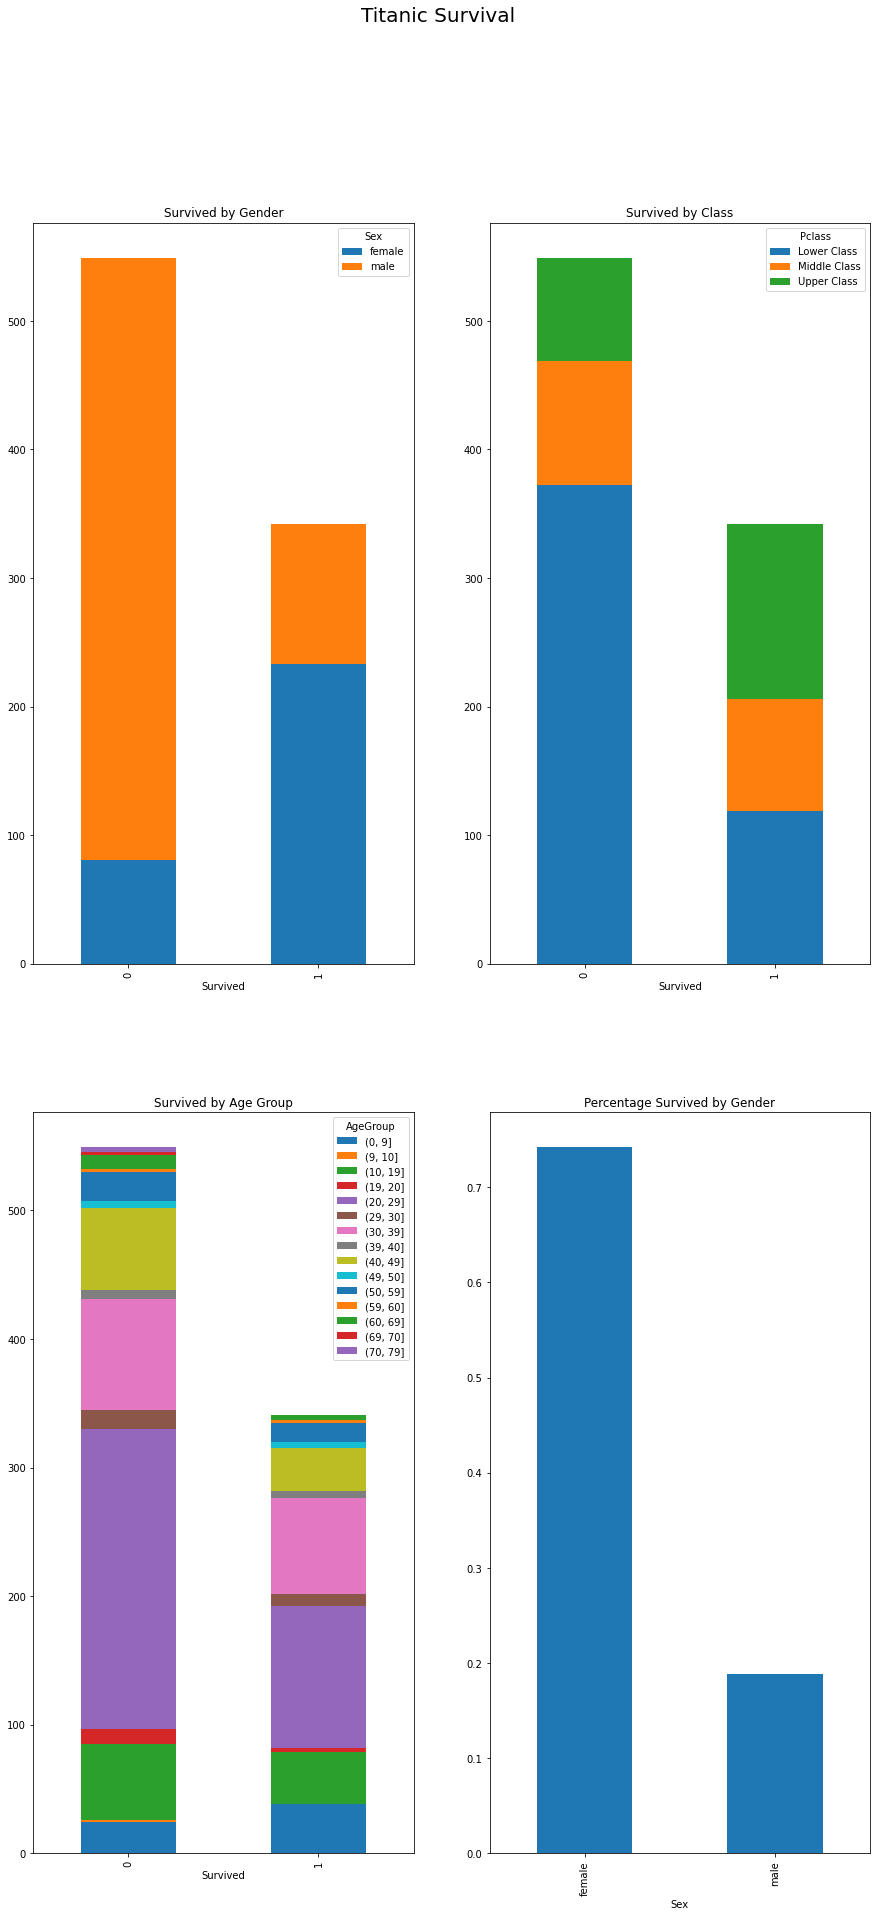

In [ ]:
#stacked bargraphs for the crosstabs

fig, axes = plt.subplots(2,2, figsize =(15,30))
fig.suptitle('Titanic Survival', size=20)
gtab.plot(kind='bar', stacked=True, ax=axes[0,0], title='Survived by Gender')
ctab.plot(kind='bar', stacked=True, ax=axes[0,1], title='Survived by Class')
atab.plot(kind='bar', stacked=True, ax =axes[1,0], title='Survived by Age Group')
p.plot(kind='bar', stacked=True, ax=axes[1,1], title='Percentage Survived by Gender')
plt.show()

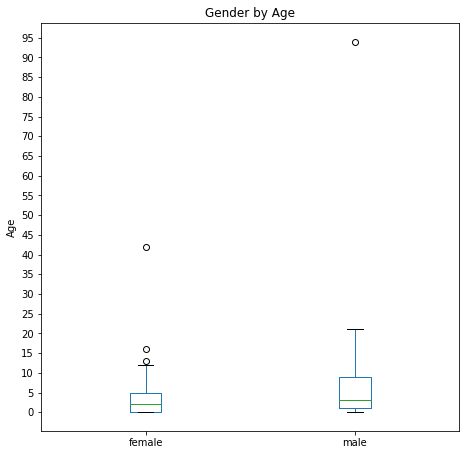

In [ ]:
#make a boxplot for the gender vs age

avstab = pd.crosstab(df["Age"], df["Sex"])

avstab

avstab.plot(kind='box', ylabel='Age', title='Gender by Age', yticks=(np.arange(0, 100, 5)), figsize=(7.5,7.5))

plt.show()